<a href="https://colab.research.google.com/github/favorov/ot_and_codon_usage/blob/master/OT_codon_usage_2_gram_negative_clades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#trying to import ot
#if it does not work, pip install -- if fails, we will get error
try:
  import ot
except ImportError:
  !pip install pot
  import ot

goocola=True
try:
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/OT+Codon usage colab')
except ImportError:
  goocola=False
#Are we in google clabs?? If somebody cares, the goocola boolean says it
#Whatever, the current folder is ready for read/write
#if we are in collab, it is My Drive/OT+Codon usage colab 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
#extract information about the frequency distribution
#def extract_freq(a, n, nc):
#        N   = a[n - 1] + a[n]
#        out = [0] * nc
#        for m in range(nc):
#            out[m] = a[n - 1 + m] / N
#        return(out)

#def extract_freq_new(a, b):
#        N   = a + b
#        j   = [a, b]
#        out = [0] * 2
#        for m in range(2):
#            out[m] = j[m] / N
#        return(out)

#counts is list. Python get lists by reference, so we modify them
def counts_to_freqs(counts):
    length=len(counts)
    csum=sum(counts)
    for i in range(length):
        counts[i]=counts[i]/csum
    return(counts)





In [184]:

#just a test for pd.read_excel
file_name = 'phen_small.xlsx'

df = pd.read_excel(io = file_name, header = [0, 1])
print(df.head(5))  # print first 5 rows of the dataframe

  Phenylalanine (Phe/F)            ...                    
                  # CDS Organelle  ...       TTT       TTC
0               3888949   genomic  ...  25537177  18665561
1               2710660   genomic  ...   3479845  24457252
2               2141118   genomic  ...  12017184  12262306
3               1387878   genomic  ...    966339  14576929
4               1462644   genomic  ...  13657458   4995245

[5 rows x 7 columns]


In [185]:
#extract test data

M = [[0, 1], [1, 0]]
a = counts_to_freqs([df.iloc[0,5],df.iloc[0,6]])
b = counts_to_freqs([df.iloc[1,5],df.iloc[1,6]])
#eps = 200
#print(type(df.iloc[1][1]))
#simple ot test
ot.emd2(a, b, M)


0.45316839065367426

In [186]:
file_name = 'phen.xlsx'

df = pd.read_excel(io = file_name, header = [0, 1])
print(df.head(5))  # print first 5 rows of the dataframe

  Phenylalanine (Phe/F)                  ...                                    
                  # CDS Organelle TaxID  ...     # TTC TTT-Fraction TTC-Fraction
0               3888949   genomic   562  ...  18665561    57.772840    42.227160
1               2710660   genomic   520  ...  24457252    12.456001    87.543999
2               2141118   genomic   573  ...  12262306    49.495208    50.504792
3               1387878   genomic   287  ...  14576929     6.217090    93.782910
4               1462644   genomic  1280  ...   4995245    73.219726    26.780274

[5 rows x 9 columns]


In [187]:
#just a test line: we want to know that all of them are 'genomic'
#and, we look hows to refer to columns
all(df.iloc[:,1]=='genomic')

True

In [188]:
#we remove short things that are phages, etc -- here it makes sense to plot
#the distribution of all the stuff by length, probaly it is bimodal
df=df[df.iloc[:,3]>=100000]

In [218]:
orgainm_name=df.iloc[:,4]
esch_index=orgainm_name.str.contains('Escherichia',regex=False)
kleb_index=orgainm_name.str.contains('Klebsiella',regex=False)
digest=df[esch_index | kleb_index]
digest

Phenylalanine (Phe/F)            ...                          
                     # CDS Organelle  ... TTT-Fraction TTC-Fraction
0                  3888949   genomic  ...    57.772840    42.227160
2                  2141118   genomic  ...    49.495208    50.504792
25                  231131   genomic  ...    49.425862    50.574138
44                  168232   genomic  ...    48.828644    51.171356
57                  128713   genomic  ...    58.385716    41.614284
...                    ...       ...  ...          ...          ...
8924                   588   genomic  ...    66.304120    33.695880
8929                   576   genomic  ...    57.554567    42.445433
8935                   534   genomic  ...    69.411033    30.588967
8943                   542   genomic  ...    74.259780    25.740220
8958                   551   genomic  ...    66.051260    33.948740

[198 rows x 9 columns]

In [220]:
#this is for annotation
bact_type=np.full(orgainm_name.shape[0], "unknown", dtype='object')
bact_type[esch_index]="Escherichia"
bact_type[kleb_index]="Klebsiella"
bact_type=bact_type[esch_index | kleb_index]


In [229]:
#calculate the distances
bact_number=digest.shape[0]
distances=np.zeros((bact_number,bact_number))
for n in range(bact_number):
  for m in range(bact_number):
    if n>m:
      a = counts_to_freqs([digest.iloc[m,5],digest.iloc[m,6]])
      b = counts_to_freqs([digest.iloc[n,5],digest.iloc[n,6]])
      distances[n,m]=ot.emd2(a, b, M)
distances=distances + np.transpose(distances)
distances

array([[0.        , 0.08277632, 0.08346978, ..., 0.11638193, 0.1648694 ,
        0.0827842 ],
       [0.08277632, 0.        , 0.00069346, ..., 0.19915825, 0.24764572,
        0.16556052],
       [0.08346978, 0.00069346, 0.        , ..., 0.19985171, 0.24833917,
        0.16625398],
       ...,
       [0.11638193, 0.19915825, 0.19985171, ..., 0.        , 0.04848747,
        0.03359773],
       [0.1648694 , 0.24764572, 0.24833917, ..., 0.04848747, 0.        ,
        0.0820852 ],
       [0.0827842 , 0.16556052, 0.16625398, ..., 0.03359773, 0.0820852 ,
        0.        ]])

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


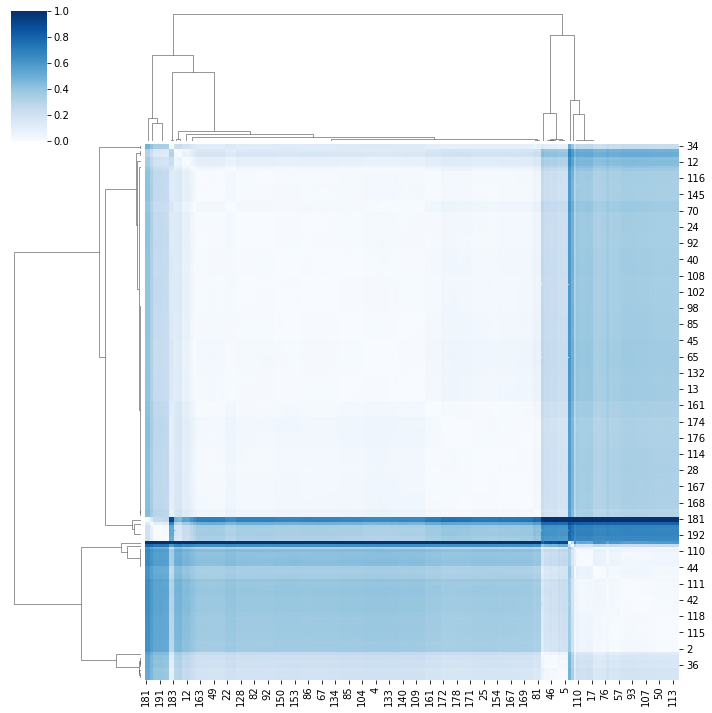

In [232]:
# Prepare a vector of color mapped to the 'cyl' column
#my_palette = dict(zip(df.cyl.unique(), ["orange","green"]))
#row_colors = df.cyl.map(my_palette)
 
# plot
sns.clustermap(distances, metric="correlation", method="single", cmap="Blues", standard_scale=1)
#, row_colors=row_colors)

